# Importar librerías

In [1]:
# Importamos librerias utiles
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Cargar la data

In [2]:
# Glass Identification DataSet
cols = np.array(["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Type"])
df = pd.read_csv("glass.data", names=cols)

In [3]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


Tenemos 7 clases de vidrio para clasificar.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [6]:
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Aparentemente en la data importada no hay valores nulos que corregir, lo que concuerda con la descripción.

In [7]:
y = df.Type
X = df.drop(["Type","Id"], axis=1)
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0


# Dividir la data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

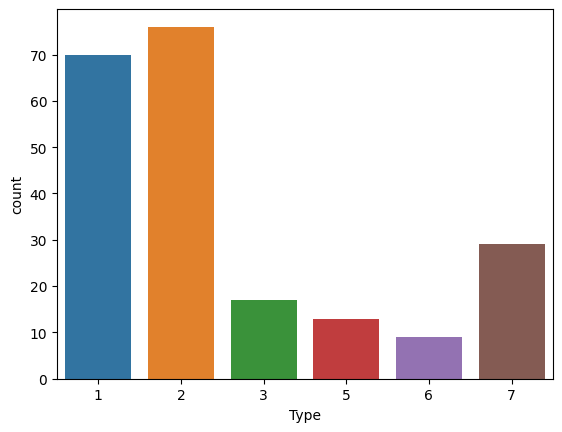

In [9]:
sns.countplot(x="Type", data=df);

<Axes: xlabel='Type', ylabel='count'>

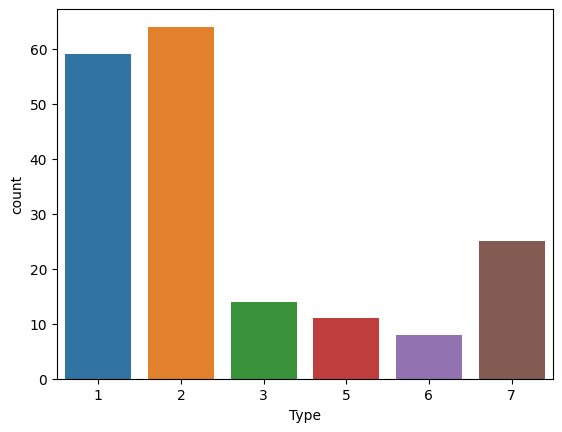

In [10]:
sns.countplot(x=y_train)

<Axes: xlabel='Type', ylabel='count'>

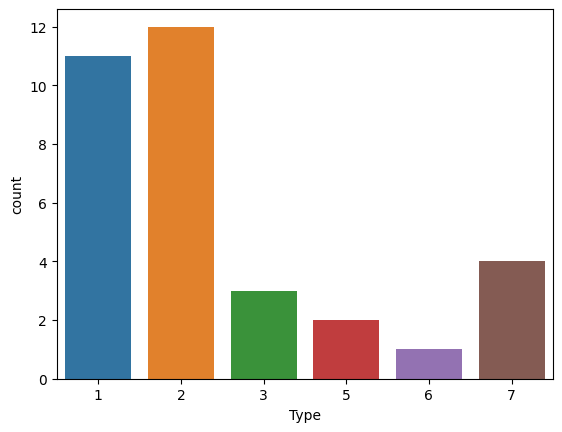

In [11]:
sns.countplot(x=y_test)

Hay un balance en la información de X e y.

# Primer modelo de clasificación

In [12]:
from sklearn.ensemble import RandomForestClassifier
knn = RandomForestClassifier()

In [13]:
knn.fit(X_train,y_train)

RandomForestClassifier()

In [14]:
knn.score(X_test, y_test)

0.696969696969697

In [15]:
IndexSet = np.random.choice(np.array(range(0,32)), 20)
IndexSet

array([22, 24,  5, 22, 20, 21, 14, 16, 21,  9, 26,  9, 16, 31,  6, 13, 17,
       28, 25,  7])

In [16]:
VarIndeps = X_test.iloc[IndexSet]
VarDepen = y_test.iloc[IndexSet]

In [17]:
YModel = knn.predict(VarIndeps)
YModel

array([6, 1, 5, 6, 1, 1, 1, 5, 1, 2, 5, 2, 5, 5, 2, 2, 6, 1, 1, 1])

In [18]:
from sklearn import metrics
metrics.confusion_matrix(VarDepen, YModel)

array([[7, 2, 0, 0, 0, 0],
       [1, 1, 0, 1, 2, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 2, 0, 0]])

In [20]:
acc1 = metrics.accuracy_score(VarDepen, YModel)
acc1

0.55

Se observa que el accuracy no es muy elevado, por lo que el modelo se puede optimizar.

In [24]:
help(RandomForestClassifier)

Help on class RandomForestClassifier in module sklearn.ensemble._forest:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and uses averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------


# Optimización de hiperparámetros

Lista de Hiperparámetros a optimizar:

*   n_estimators: Número de árboles en el bosque
*   max_depth: Máxima profundidad del árbol
*   criterion: Mide la calidad de una partición

In [25]:
# Cargar la clase GridSearchCV
from sklearn.model_selection import GridSearchCV

In [26]:
# Creación del estimador
rf_mdl = RandomForestClassifier()

In [33]:
Dict_glass = {"n_estimators": [1, 3, 5, 10],
                 "max_depth": [10, 50, 100],
                 "criterion": ["gini", "entropy"]}

In [34]:
rf_mdl_GS1 = GridSearchCV(rf_mdl,
                          param_grid=Dict_glass,
                          cv=5,
                          verbose=4,
                          n_jobs=2)

In [35]:
BM_rf_glass = rf_mdl_GS1.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [36]:
BM_rf_glass.best_params_

{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 10}

In [37]:
BM_rf_glass.best_estimator_

RandomForestClassifier(max_depth=50, n_estimators=10)

In [38]:
BM_rf_glass.best_score_

0.7789789789789789

El accuracy final es superior al obtenido con el primer modelo.

In [39]:
# Creamos el mejor modelo
rf_final = BM_rf_glass.best_estimator_
rf_final.fit(X_train, y_train)

RandomForestClassifier(max_depth=50, n_estimators=10)

Guardamos el modelo final como archivo pickle.

In [40]:
# Guardamos el mejor modelo ajustado (memoria ram) al disco duro

import pickle
ArchivoModelCancer = "ModeloRegLog_Clase7.pkl"
with open(ArchivoModelCancer, "wb") as file:
  pickle.dump(rf_final, file)